## Panorama Stitching using SuperGlue
SuperGlue network is a Graph Neural Network combined with an Optimal Matching layer that is trained to perform matching on two sets of sparse image features.

***Source Images from Open Adobe Project***
[Adobe Panoramas](https://liquidtelecom.dl.sourceforge.net/project/adobedatasets.adobe/adobe_panoramas.tgz)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config Completer.use_jedi = False
import os
import torch.nn.functional as F

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_frames(folder_path):
    frames = []
    for file_name in sorted(os.listdir(folder_path)):
        if file_name.endswith(".jpg") or file_name.endswith(".jpeg"):
            file_path = os.path.join(folder_path, file_name)
            frame = cv.imread(file_path)
            frames.append(frame)
    return frames

# Example usage
folder_path1 = "/content/drive/MyDrive/Superglue/ass/applied_homo"
frames = load_frames(folder_path1)

In [ ]:
len(frames)

408

In [ ]:
# # generating the necessary txt file to input for the super glue algorithm
# img_name = 'frame' # set of outdoor images
# num_images = 8
# # Order of the images. To stitch left and right images as depicted in the below
# order = range(num_images -1,0,-1)
# with open('adobe_panorama.txt', 'w') as file:
#     for i in order:
#         file.write("{img}_{:02}.png {img}-{:02}.png\n".format(i,i-1, img = img_name))

In [ ]:
import re

# List all files in the directory
files = os.listdir("/content/drive/MyDrive/Superglue/ass/applied_homo")

# Define a function to extract the numeric part from the filename
def extract_number(filename):
    return int(re.search(r'\d+', filename).group())

# Sort the files based on the numeric part of the filename
sorted_files = sorted(files, key=extract_number)

# Create a new text file to write the filenames
with open('file_list.txt', 'w') as file:
    # Iterate through the sorted files and write their names in the specified format
    for i in range(len(sorted_files) - 1):
        file.write(f"{sorted_files[i]} {sorted_files[i + 1]}\n")

In [ ]:
# Running the super glue algorithm on outdoor dataset to match features
"""
    Do not resize the images,
    If you need to use the extracted keypoints,
    to process the "original" source images.

    Set the parameter to -1 to avoid resizing
    --resize -1

    Other parameter can be set as folows,
    to extract the best matching features.
    * Non maximum Suppression Radius = 5
    * Matching Confidence = 0.9
"""
!python3 /content/drive/MyDrive/Superglue/ass/match_pairs.py  --resize -1\
                        --superglue outdoor \
                        --max_keypoints 2048 \
                        --nms_radius 5 \
                        --resize_float \
                        --input_dir /content/drive/MyDrive/Superglue/ass/applied_homo/ \
                        --input_pairs /content/drive/MyDrive/Superglue/ass/file_list.txt \
                        --output_dir /content/drive/MyDrive/Superglue/ass/adobe_panorama/output \
                        --viz \
                        --keypoint_threshold 0.05 \
                        --match_threshold 0.9

Namespace(input_pairs='/content/drive/MyDrive/Superglue/ass/file_list.txt', input_dir='/content/drive/MyDrive/Superglue/ass/applied_homo/', output_dir='/content/drive/MyDrive/Superglue/ass/adobe_panorama/output', max_length=-1, resize=[-1], resize_float=True, superglue='outdoor', max_keypoints=2048, keypoint_threshold=0.05, nms_radius=5, sinkhorn_iterations=20, match_threshold=0.9, viz=True, eval=False, fast_viz=False, cache=False, show_keypoints=False, viz_extension='png', opencv_display=False, shuffle=False, force_cpu=False)
Will not resize images
Running inference on device "cpu"
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Looking for data in directory "/content/drive/MyDrive/Superglue/ass/applied_homo"
Will write matches to directory "/content/drive/MyDrive/Superglue/ass/adobe_panorama/output"
Will write visualization images to directory "/content/drive/MyDrive/Superglue/ass/adobe_panorama/output"
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py

In [ ]:
#generatig the npz files for extract matching information
npz_files = []

for i in range(1, 407):
    current_frame = f"frame{i}_frame{i + 1}_matches.npz"
    npz_files.append(current_frame)

print(npz_files)
for file in npz_files:
    path = "/content/drive/MyDrive/Superglue/ass/adobe_panorama/output/"+file
    npz = np.load(path)
print(npz_files)

['frame1_frame2_matches.npz', 'frame2_frame3_matches.npz', 'frame3_frame4_matches.npz', 'frame4_frame5_matches.npz', 'frame5_frame6_matches.npz', 'frame6_frame7_matches.npz', 'frame7_frame8_matches.npz', 'frame8_frame9_matches.npz', 'frame9_frame10_matches.npz', 'frame10_frame11_matches.npz', 'frame11_frame12_matches.npz', 'frame12_frame13_matches.npz', 'frame13_frame14_matches.npz', 'frame14_frame15_matches.npz', 'frame15_frame16_matches.npz', 'frame16_frame17_matches.npz', 'frame17_frame18_matches.npz', 'frame18_frame19_matches.npz', 'frame19_frame20_matches.npz', 'frame20_frame21_matches.npz', 'frame21_frame22_matches.npz', 'frame22_frame23_matches.npz', 'frame23_frame24_matches.npz', 'frame24_frame25_matches.npz', 'frame25_frame26_matches.npz', 'frame26_frame27_matches.npz', 'frame27_frame28_matches.npz', 'frame28_frame29_matches.npz', 'frame29_frame30_matches.npz', 'frame30_frame31_matches.npz', 'frame31_frame32_matches.npz', 'frame32_frame33_matches.npz', 'frame33_frame34_matches

For each keypoint in `keypoints0`, the `matches` array indicates the index of the matching keypoint in `keypoints1`, or `-1` if the keypoint is unmatched.

In [ ]:
# extracting information from the npz files
def loadNPZ(npz_file):
    npz = np.load('/content/drive/MyDrive/Superglue/ass/adobe_panorama/output/'+ npz_file)
    point_set1 = npz['keypoints0'][npz['matches']>-1]
    matching_indexes =  npz['matches'][npz['matches']>-1] # -1 if the keypoint is unmatched
    point_set2 = npz['keypoints1'][matching_indexes]
    print("Number of matching points for the findHomography algorithm:")
    print("In left  image:", len(point_set1),"\nIn right image:", len(point_set2))
    return point_set1, point_set2

In [ ]:
# def pltSourceImages(imageSet):
#     im_left = cv.imread('adobe_panorama/frame-{:02}.png'.format(imageSet),cv.IMREAD_ANYCOLOR)
#     im_right = cv.imread('adobe_panorama/frame-{:02}.png'.format(imageSet -1),cv.IMREAD_ANYCOLOR)

#     # Marking the detected features on the two images.
#     for point in point_set1.astype(np.int32):
#         cv.circle(im_left, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

#     for point in point_set2.astype(np.int32):
#         cv.circle(im_right, tuple(point), radius=8, color=(255, 255, 0), thickness=-1)

#     fig = plt.figure(figsize = (10,10))
#     plt.subplot(121),plt.imshow(im_left, cmap='gray', vmin = 0, vmax = 255)
#     plt.subplot(122),plt.imshow(im_right, cmap='gray', vmin = 0, vmax = 255)
#     plt.show()

In [ ]:
# def plotMatches(imageSet):
#     plt.figure(figsize=(10,10))
#     matched_points = cv.imread('adobe_panorama/output/hotel-{:02}_hotel-{:02}_matches.png'.\
#                      format(imageSet, imageSet -1),cv.IMREAD_ANYCOLOR)
#     plt.imshow(matched_points, cmap='gray', vmin = 0, vmax = 255)
#     plt.show()
    if point_set1.shape[0] < 4:
      continue


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Initialize the first image for the panorama
first_image = cv.imread('/content/drive/MyDrive/Superglue/ass/applied_homo/frame407.jpg', cv.IMREAD_ANYCOLOR)
panorama = first_image

# Take only the top 30 pixels of subsequent images
top_pixels = 30

# Initialize the total panorama width and height based on the first image
total_width = first_image.shape[1]
total_height = first_image.shape[0]

for imgSet in range(407, 1, -1):
    # loading points
    point_set1, point_set2 = loadNPZ(npz_files[407 - imgSet])

    if point_set1.shape[0] < 4:
      continue

    # getting the required source images
    im_left = cv.imread(f'/content/drive/MyDrive/Superglue/ass/applied_homo/frame{imgSet}.jpg', cv.IMREAD_ANYCOLOR)
    im_right = cv.imread(f'/content/drive/MyDrive/Superglue/ass/applied_homo/frame{imgSet-1}.jpg', cv.IMREAD_ANYCOLOR)

    # find Homography between two source images
    H, status = cv.findHomography(point_set1, point_set2, cv.RANSAC, 5.0)

    # warp the right image to match the left using the homography matrix
    warped_image = cv.warpPerspective(im_right, np.linalg.inv(H), (im_left.shape[1], im_left.shape[0]))

    # Consider only the top 30 pixels of the warped image
    warped_image_top = warped_image[:top_pixels, :]

    # Create a new canvas for the expanded panorama
    expanded_panorama = np.zeros((total_height + top_pixels, total_width, 3), dtype=np.uint8)

    # Add the top 30 pixels of the warped image at the beginning of the existing panorama
    expanded_panorama[0:top_pixels, 0:warped_image_top.shape[1]] = warped_image_top

    # Copy the existing panorama below the top segment of the warped image
    expanded_panorama[top_pixels:total_height + top_pixels, 0:total_width] = panorama

    # Update the panorama with the expanded version
    panorama = expanded_panorama

    # Update the total panorama height to accommodate the new image
    total_height += top_pixels

    # # Display the panorama so far
    # plt.figure(figsize=(10, 10))
    # plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
    # plt.show()
    # print("-" * 100)


Number of matching points for the findHomography algorithm:
In left  image: 9 
In right image: 9
Number of matching points for the findHomography algorithm:
In left  image: 5 
In right image: 5
Number of matching points for the findHomography algorithm:
In left  image: 6 
In right image: 6
Number of matching points for the findHomography algorithm:
In left  image: 5 
In right image: 5
Number of matching points for the findHomography algorithm:
In left  image: 6 
In right image: 6
Number of matching points for the findHomography algorithm:
In left  image: 6 
In right image: 6
Number of matching points for the findHomography algorithm:
In left  image: 9 
In right image: 9
Number of matching points for the findHomography algorithm:
In left  image: 7 
In right image: 7
Number of matching points for the findHomography algorithm:
In left  image: 7 
In right image: 7
Number of matching points for the findHomography algorithm:
In left  image: 11 
In right image: 11
Number of matching points fo

In [ ]:
# Save the final panorama in the "ass" folder
output_path = '/content/drive/MyDrive/Superglue/ass/final_panorama.jpg'
cv.imwrite(output_path, panorama)

True

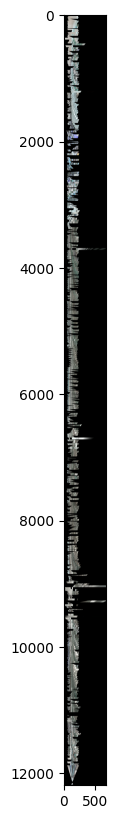

----------------------------------------------------------------------------------------------------


In [ ]:
# Display the panorama so far
plt.figure(figsize=(10, 10))
plt.imshow(panorama, cmap='gray', vmin=0, vmax=255)
plt.show()
print("-" * 100)